## ExMAS
> Equilibrium matching


In [1]:
import os
import math
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
cwd = os.getcwd()
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import display
pd.options.display.max_columns = None

In [3]:
os.chdir(os.path.join(cwd,'../../..'))
import ExMAS.main
import ExMAS.utils
from ExMAS.utils import inData as inData
from ExMAS.main import matching
from ExMAS.extras import games, pricings, prunings, pipeline

In [4]:
params = ExMAS.utils.get_config('ExMAS/spinoffs/game/ams.json') # load the default 
params.t0 = pd.to_datetime(params.t0)
params.matching_obj = 'u_pax'
inData = ExMAS.utils.load_G(inData, params, stats=True)  # download the graph

In [5]:
params.nP = 50
params.simTime = 0.1
params.shared_discount = 0.3
inData = ExMAS.utils.generate_demand(inData, params)  # generate requests

In [6]:
params.veh_cost = 2.3 * params.VoT / params.avg_speed  # operating costs per kilometer
params.fixed_ride_cost = 1  # ride fixed costs (per vehicle)
params.time_cost = params.VoT  # travellers' cost per travel time
params.wait_cost = params.time_cost * 1.5  # and waiting
params.sharing_penalty_fixed = 0  # fixed penalty (EUR) per
params.sharing_penalty_multiplier = 0  # fixed penalty (EUR) per

In [7]:
plt.style.use(['science'])
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
from matplotlib import rc
import matplotlib.pylab as plt

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [8]:
from ExMAS.main import init_log
params.logger_level = 'INFO'
inData.logger = init_log(params)

In [9]:
inData = ExMAS.main(inData, params, plot = False)
KPIs = inData.sblts.res.to_frame('u_pax')

12-02-21 10:10:30-INFO-Initializing pairwise trip shareability between 50 and 50 trips.
12-02-21 10:10:30-INFO-creating combinations
12-02-21 10:10:30-INFO-2450	 nR*(nR-1)
12-02-21 10:10:30-INFO-Reduction of feasible pairs by 97.67%
12-02-21 10:10:30-INFO-Degree 2 	Completed
12-02-21 10:10:30-INFO-trips to extend at degree 2 : 130
12-02-21 10:10:31-INFO-At degree 2 feasible extensions found out of 58 searched
12-02-21 10:10:31-INFO-Degree 3 	Completed
12-02-21 10:10:31-INFO-trips to extend at degree 3 : 58
12-02-21 10:10:31-INFO-At degree 3 feasible extensions found out of 3 searched
12-02-21 10:10:31-INFO-Degree 4 	Completed
12-02-21 10:10:31-INFO-trips to extend at degree 4 : 3
12-02-21 10:10:31-INFO-At degree 4 feasible extensions found out of 0 searched
12-02-21 10:10:31-INFO-Degree 5 	Completed
12-02-21 10:10:31-INFO-No more trips to exted at degree 5
12-02-21 10:10:31-INFO-Matching 50 trips to 241 rides in order to min u_pax
12-02-21 10:10:31-INFO-Problem solution: Optimal. 
Tota

In [10]:
inData = games.prepare_PoA(inData)

12-02-21 10:10:31-WARNING-Prepare for game:  1/6
12-02-21 10:10:31-WARNING-Prepare for game:  2/6
12-02-21 10:10:32-WARNING-Prepare for game:  3/6
12-02-21 10:10:32-WARNING-Prepare for game:  4/6
12-02-21 10:10:35-WARNING-Prepare for game:  5/6
12-02-21 10:10:35-WARNING-Prepare for game:  6/6


In [11]:
inData.sblts.rides.tail(4)

,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index,lambda_r,PassHourTrav_ns,row,selected,treqs,deps,delays,ttravs,pruned,indexes_set,subgroups,supergroups,rankings,mean_ranking,rel_rankings,mean_rel_ranking,PoAs,mean_PoA,total_PoA,squared_PoA,probs,min_prob,logsum_prob
237,"[16, 6, 31]",27.947325,1071,30,"[10.672725, 9.240874999999999, 8.033725]","[55.5, 59, 298, 487, 109, 118]","[16, 6, 31]","[6, 16, 31]",3,237,0.433932,1892,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",0,"[139, 16, 211]","[55.5, 114.5, 412.5]","[-83.5, 98.5, 201.5]","[953, 894, 714]",True,"{16, 6, 31}","[6, 16, 31, 116, 119, 120, 121, 174, 176, 207,...","[207, 237]","[43.0, 19.0, 13.0]",25.0,"[0.8958333333333334, 0.5428571428571428, 0.8125]",0.750397,"[1.1999999999999993, 0.5, 1.0999999999999996]",0.933333,2.8,0.966667,"[2.3781937456642077e-06, 0.001242081988367117,...",2.378194e-06,-30.697164
238,"[6, 16, 35, 18]",39.760000,1173,40,"[9.47065, 10.474799999999998, 10.1055499999999...","[54.0, 62, 125, 153, 509, 109, 22, 193]","[6, 16, 35, 18]","[6, 16, 35, 18]",4,238,0.570330,2730,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",0,"[16, 139, 224, 148]","[54.0, 116.0, 241.0, 394.0]","[38.0, -23.0, 17.0, 246.0]","[849, 918, 986, 833]",True,"{16, 18, 35, 6}","[6, 16, 18, 35, 67, 68, 69, 70, 71, 72, 114, 1...","[238, 239, 240]","[25.0, 38.0, 16.0, 17.0]",24.0,"[0.7142857142857143, 0.7916666666666666, 0.5, ...",0.671488,"[0.8000000000000007, 1.0, 0.6999999999999993, ...",0.850000,3.4,0.735000,"[6.183962087332603e-05, 1.757260700083884e-05,...",1.757261e-05,-38.638906
239,"[35, 6, 16, 18]",41.275150,1225,40,"[11.16115, 9.493399999999998, 10.7932999999999...","[86.0, 83, 62, 231, 509, 130, 107, 103]","[35, 6, 16, 18]","[6, 35, 16, 18]",4,239,0.551282,2730,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",0,"[224, 16, 139, 148]","[86.0, 169.0, 231.0, 462.0]","[-138.0, 153.0, 92.0, 314.0]","[1015, 932, 1080, 849]",True,"{16, 18, 35, 6}","[6, 16, 18, 35, 67, 68, 69, 70, 71, 72, 114, 1...","[238, 239, 240]","[32.0, 26.0, 45.0, 21.0]",31.0,"[1.0, 0.7428571428571429, 0.9375, 0.84]",0.880089,"[1.799999999999999, 0.8000000000000007, 1.3000...",1.225000,4.9,1.642500,"[8.011392783093686e-09, 6.183962087332603e-05,...",8.011393e-09,-53.638906
240,"[16, 6, 35, 18]",39.309550,1138,40,"[10.549874999999998, 9.090724999999999, 10.071...","[55.5, 59, 93, 153, 509, 109, 22, 193]","[16, 6, 35, 18]","[6, 16, 35, 18]",4,240,0.583150,2730,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",0,"[139, 16, 224, 148]","[55.5, 114.5, 207.5, 360.5]","[-83.5, 98.5, -16.5, 212.5]","[923, 864, 986, 833]",True,"{16, 18, 35, 6}","[6, 16, 18, 35, 67, 68, 69, 70, 71, 72, 114, 1...","[238, 239, 240]","[39.0, 14.0, 17.0, 12.0]",20.5,"[0.8125, 0.4, 0.53125, 0.48]",0.555937,"[1.0, 0.40000000000000036, 0.6999999999999993,...",0.725000,2.9,0.572500,"[1.757260700083884e-05, 0.0033763288984346132,...",1.757261e-05,-33.638906


In [22]:
RIDE = 240

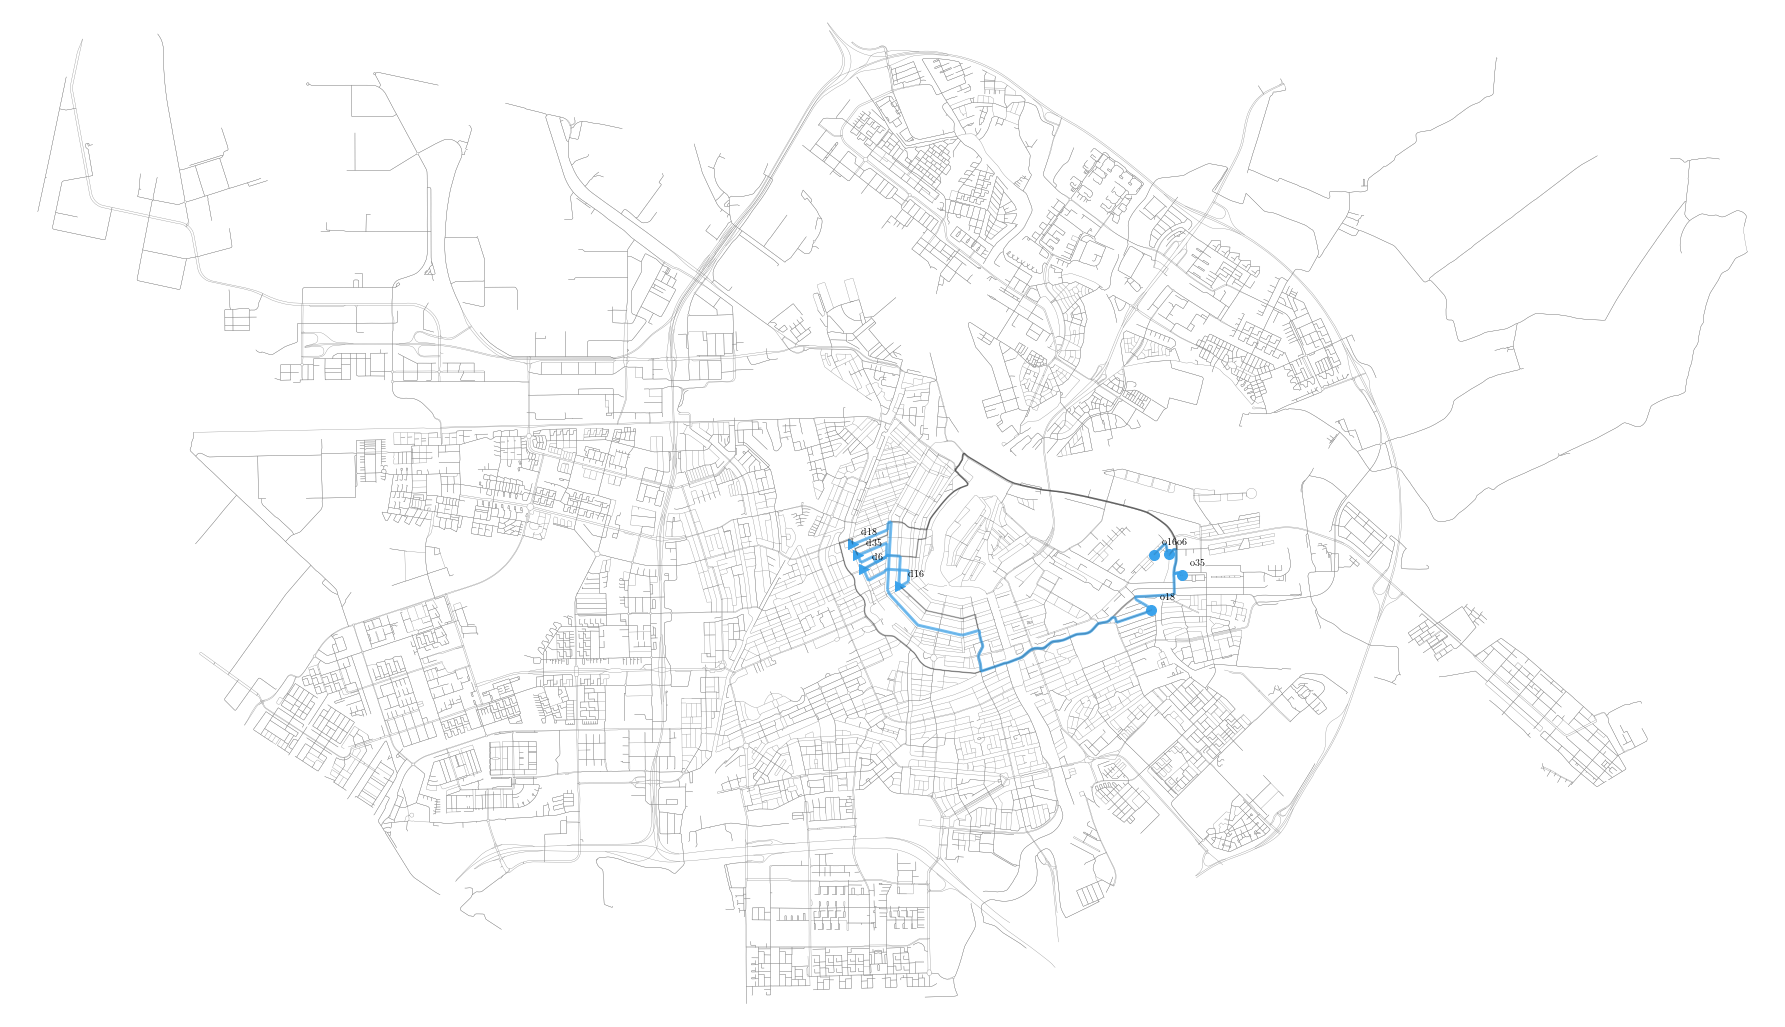

In [31]:
ExMAS.utils.plot_map_rides(inData,[RIDE], light = False, m_size = 100)

In [16]:

params.time_cost = params.VoT # travellers' cost per travel time
params.wait_cost = params.time_cost*1.5 # and waiting
params.sharing_penalty_fixed = 0 # fixed penalty (EUR) per 
params.sharing_penalty_multiplier = 0.2 # fixed penalty (EUR) per 

params.veh_cost = 2.3*params.VoT/params.avg_speed # operating costs per kilometer
params.fixed_ride_cost = 1 # ride fixed costs (per vehicle)

In [27]:
inData = ExMAS.extras.pricings.update_costs(inData, params)
inData = pricings.uniform_split(inData) 
inData = pricings.externality_split(inData) 
inData = pricings.residual_split(inData) 
inData = pricings.subgroup_split(inData) 

In [23]:
table_1 = inData.sblts.rides_multi_index.loc[RIDE][['ttrav_sh','delay','cost_user','cost_single','UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']]
table_1.delay = table_1.delay.apply(lambda x: min(237,abs(x)))
table_1.columns = ['$t_i(G)$', '$w_i(G)$', '$C(G,i)$', '$C(\{i\},i)$', '$C_i(G)$ uniform',
       '$C_i(G)$ externality-based', '$C_i(G)$ residual', '$C_i(G)$ subgroup-based']                                             

print(table_1.round(2).to_latex())
table_1

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  \$t\_i(G)\$ &  \$w\_i(G)\$ &  \$C(G,i)\$ &  \$C(\textbackslash \{i\textbackslash \},i)\$ &  \$C\_i(G)\$ uniform &  \$C\_i(G)\$ externality-based &  \$C\_i(G)\$ residual &  \$C\_i(G)\$ subgroup-based \\
\midrule
16 &       923 &      83.5 &      4.31 &          9.34 &              6.87 &                        5.44 &               7.22 &                     6.31 \\
6  &       864 &      98.5 &      4.15 &          8.39 &              6.87 &                        4.58 &               6.49 &                     6.30 \\
35 &       986 &      16.5 &      4.23 &          9.33 &              6.87 &                        6.62 &               7.21 &                     6.31 \\
18 &       833 &     212.5 &      4.61 &          8.47 &              6.87 &                        8.82 &               6.55 &                     8.56 \\
\bottomrule
\end{tabular}



,$t_i(G)$,$w_i(G)$,"$C(G,i)$","$C(\{i\},i)$",$C_i(G)$ uniform,$C_i(G)$ externality-based,$C_i(G)$ residual,$C_i(G)$ subgroup-based
16,923,83.5,4.314975,9.33910,6.865963,5.440050,7.218599,6.306034
6,864,98.5,4.145925,8.39200,6.865963,4.581325,6.486544,6.296846
35,986,16.5,4.227825,9.32755,6.865963,6.619725,7.209671,6.305922
18,833,212.5,4.614225,8.47285,6.865963,8.817550,6.549036,8.555047


In [24]:
l = table_1.sum().values
[print(str(round(_,2)) + ' & ') for _ in l]

3606.0 & 
411.0 & 
17.3 & 
35.53 & 
27.46 & 
25.46 & 
27.46 & 
27.46 & 


[None, None, None, None, None, None, None, None]

In [25]:
[inData.sblts.rides.loc[RIDE].u_veh,inData.sblts.rides.loc[RIDE].costs_veh]

[1138, 10.1609]

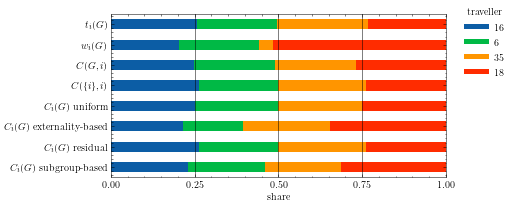

In [30]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
fig, ax = plt.subplots(figsize = (6,3))
from matplotlib.lines import Line2D
to_plot = table_1/table_1.sum()
to_plot = to_plot[to_plot.columns[::-1]]
to_plot.T.plot.barh(stacked = True, legend = False, ax = ax)
ax.set_xlabel('share')
custom = [Line2D([], [], marker='', color=colors[i], lw = 5, linestyle='-') for i in [0,1,2,3]]

ax.legend(custom, to_plot.index.values, loc='upper right',bbox_to_anchor=(1.2, 1.1), title = 'traveller') 
ax.set_xticks([0,0.25,0.5,0.75,1])
ax.set_xlim((0,1))
for line in [0.25,0.5,0.75]:
    ax.axvline(line,color = 'black', alpha = 0.5, lw = 1)
#plt.savefig('ride_bars.png', dpi = 600)


### incidence matrix
rows are trips columns are rides,
1 if trip blongs to a ride, 0 otherwise

### parameters

eq. 1 , eq.2

In [34]:
inData = pricings.uniform_split(inData) 
inData = pricings.externality_split(inData) 
inData = pricings.residual_split(inData) 
inData = pricings.subgroup_split_bas(inData) 

04-02-21 14:40:06-INFO-No LaTeX-compatible font found for the serif font family in rcParams. Using default.
04-02-21 14:40:06-INFO-No LaTeX-compatible font found for the serif font family in rcParams. Using default.
04-02-21 14:40:06-INFO-No LaTeX-compatible font found for the serif font family in rcParams. Using default.
04-02-21 14:40:06-INFO-No LaTeX-compatible font found for the serif font family in rcParams. Using default.
04-02-21 14:40:06-INFO-No LaTeX-compatible font found for the serif font family in rcParams. Using default.
04-02-21 14:40:06-INFO-No LaTeX-compatible font found for the serif font family in rcParams. Using default.
04-02-21 14:40:06-INFO-No LaTeX-compatible font found for the serif font family in rcParams. Using default.
04-02-21 14:40:06-INFO-No LaTeX-compatible font found for the serif font family in rcParams. Using default.
04-02-21 14:40:06-INFO-No LaTeX-compatible font found for the serif font family in rcParams. Using default.
04-02-21 14:40:06-INFO-No La

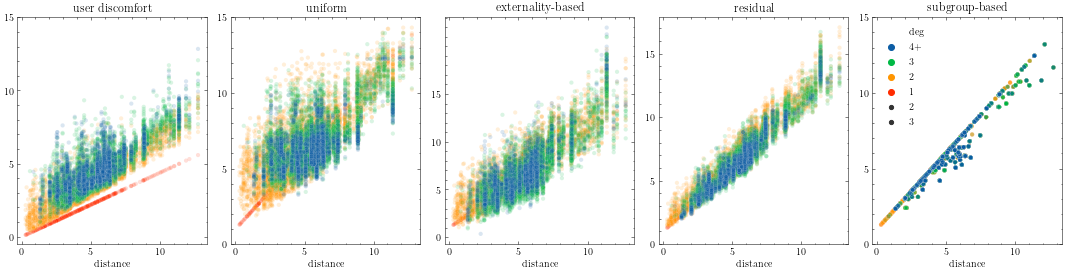

In [39]:
df = inData.sblts.rides_multi_index
#palette = sns.color_palette(colors[0:4])
df['travel time'] = df['ttrav_sh']
df['user discomfort'] = df['cost_user']
cols = ['user discomfort','UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']
titles = ['user discomfort','uniform', 'externality-based','residual','subgroup-based']

fig, axes = plt.subplots(1,len(cols), figsize = (len(cols)*3,4), sharey=False)
df = inData.sblts.rides_multi_index
df['deg'] = df.degree.apply(lambda x: '4+' if x>3 else str(x))
df['distance'] = df['dist']/1000

for i,col in enumerate(cols):
    
    
    axes[i].set_title(titles[i])
    sns.scatterplot(x='distance',y=col, data = df, ax = axes[i], hue = 'deg', size = 3,
                    hue_order=["4+", "3",'2','1'],
                    alpha = 0.15, 
                    #palette = palette,
                   linewidth=0.3)
    axes[i].set_ylabel('')
    axes[i].set_xticks([0,5, 10])
    axes[i].set_yticks([0,5,10,15])
    if i<len(cols)-1:
        axes[i].get_legend().remove()
plt.tight_layout() 
#plt.savefig('f3.tiff', dpi = 600)
plt.savefig('f3.png', dpi = 300)
#plt.savefig('f3.pdf', rasterized = True)

In [38]:
import warnings
warnings.filterwarnings("ignore")

In [49]:
inData.sblts['min_cost'] = rides_multi_index.groupby('traveller').cost_user.min()

traveller
0      2.7090
1      1.8165
2      0.7315
3      0.8120
4      0.6755
        ...  
395    2.6530
396    5.3095
397    1.8130
398    1.9460
399    2.1000
Name: cost_user, Length: 400, dtype: float64

### pricings with various strategies

In [ ]:
inData = ExMAS.extras.pricings.update_costs(inData, params)
inData = pricings.uniform_split(inData) 
inData = pricings.externality_split(inData) 
inData = pricings.residual_split(inData) 
inData = pricings.subgroup_split_bas(inData) 
rs = inData.sblts.rides.sample(4).index
plt.rcParams['figure.figsize'] = [12,12]
fig, ax = plt.subplots()
scatter_matrix(inData.sblts.rides_multi_index[['dist', 'ttrav_sh', 'UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP', 'total_group_cost']], grid = False, diagonal = 'kde', alpha = 0.2, ax = ax)
fig.suptitle('correlations between various prices and features')
inData.sblts.rides_multi_index.loc[rs,:]

# Differences between algorithms and pricings

## TNE

In [ ]:
ret = dict()
params.logger_level = 'INFO'
inData.logger = init_log(params)
for PRICING in ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']:
    inData = pipeline.single_eval(inData, params, prunings.algo_TNE, PRICING = PRICING, ALGO = 'TNE', minmax = ['min'], store_res = False)
    inData.sblts.res['costs_veh'] = inData.sblts.rides[inData.sblts.rides.selected==1]['costs_veh'].sum()
    inData.sblts.res['obj'] = inData.sblts.rides[inData.sblts.rides.selected==1][PRICING].sum()
    inData.sblts.res['costs_user'] = inData.sblts.rides[inData.sblts.rides.selected==1][ 'costs_user'].sum()
    inData.sblts.res['pruned'] = inData.sblts.rides[inData.sblts.rides.selected==1].shape[0]
    ret[PRICING] = inData.sblts.res.loc[['VehHourTrav','PassHourTrav','shared_ratio','costs_veh', 'costs_user','pruned', 'obj']]
pd.DataFrame(ret).T

## Hermetic

In [ ]:
ret = dict()
params.logger_level = 'WARNING'
inData.logger = init_log(params)
for PRICING in ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']:
    inData = pipeline.single_eval(inData, params, prunings.algo_HERMETIC, PRICING = PRICING, ALGO = 'HERMETIC', minmax = ['min'], store_res = False)
    inData.sblts.res['costs_veh'] = inData.sblts.rides[inData.sblts.rides.selected==1]['costs_veh'].sum()
    inData.sblts.res['obj'] = inData.sblts.rides[inData.sblts.rides.selected==1][PRICING].sum()
    inData.sblts.res['costs_user'] = inData.sblts.rides[inData.sblts.rides.selected==1][ 'costs_user'].sum()
    inData.sblts.res['pruned'] = inData.sblts.rides[inData.sblts.rides.selected==1].shape[0]
    ret[PRICING] = inData.sblts.res.loc[['VehHourTrav','PassHourTrav','shared_ratio','costs_veh', 'costs_user','pruned', 'obj']]
pd.DataFrame(ret).T

## RUE

In [ ]:
ret = dict()
params.logger_level = 'INFO'
inData.logger = init_log(params)
for PRICING in ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']:
    inData = pipeline.single_eval(inData, params, prunings.algo_RUE, PRICING = PRICING, ALGO = 'RUE', minmax = ['min'], store_res = False)
    inData.sblts.res['costs_veh'] = inData.sblts.rides[inData.sblts.rides.selected==1]['costs_veh'].sum()
    inData.sblts.res['obj'] = inData.sblts.rides[inData.sblts.rides.selected==1][PRICING].sum()
    inData.sblts.res['costs_user'] = inData.sblts.rides[inData.sblts.rides.selected==1][ 'costs_user'].sum()
    inData.sblts.res['pruned'] = inData.sblts.rides[inData.sblts.rides.selected==1].shape[0]
    ret[PRICING] = inData.sblts.res.loc[['VehHourTrav','PassHourTrav','shared_ratio','costs_veh', 'costs_user','pruned', 'obj']]
pd.DataFrame(ret).T

## RSIE

In [ ]:
ret = dict()
params.logger_level = 'INFO'
inData.logger = init_log(params)
for PRICING in ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']:
    inData = pipeline.single_eval(inData, params, prunings.algo_RSIE, PRICING = PRICING, ALGO = 'RSIE', minmax = ['min'], store_res = False)
    inData.sblts.res['costs_veh'] = inData.sblts.rides[inData.sblts.rides.selected==1]['costs_veh'].sum()
    inData.sblts.res['obj'] = inData.sblts.rides[inData.sblts.rides.selected==1][PRICING].sum()
    inData.sblts.res['costs_user'] = inData.sblts.rides[inData.sblts.rides.selected==1][ 'costs_user'].sum()
    inData.sblts.res['pruned'] = inData.sblts.rides[inData.sblts.rides.selected==1].shape[0]
    ret[PRICING] = inData.sblts.res.loc[['VehHourTrav','PassHourTrav','shared_ratio','costs_veh', 'costs_user','pruned', 'obj']]
pd.DataFrame(ret).T

## TSE

In [ ]:
ret = dict()
params.logger_level = 'INFO'
inData.logger = init_log(params)
for PRICING in ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']:
    inData = pipeline.single_eval(inData, params, prunings.algo_TSE, PRICING = PRICING, ALGO = 'TSE', minmax = ['min'], store_res = False)
    inData.sblts.res['costs_veh'] = inData.sblts.rides[inData.sblts.rides.selected==1]['costs_veh'].sum()
    inData.sblts.res['obj'] = inData.sblts.rides[inData.sblts.rides.selected==1][PRICING].sum()
    inData.sblts.res['costs_user'] = inData.sblts.rides[inData.sblts.rides.selected==1][ 'costs_user'].sum()
    inData.sblts.res['pruned'] = inData.sblts.rides[inData.sblts.rides.selected==1].shape[0]
    ret[PRICING] = inData.sblts.res.loc[['VehHourTrav','PassHourTrav','shared_ratio','costs_veh', 'costs_user','pruned', 'obj']]
pd.DataFrame(ret).T

---
(c) Rafał Kucharski, Delft, 2020